# Introduction

#### Analysis of "Analyst" vacancies on Enbek.kz

In this project, I will use the term "prestigious job / vacancy", this is a job / vacancy that has high salary, normal working conditions and, accordingly, high requirements in education and experience. That is, I want to understand in which regions there are prestigious jobs / vacancies.

**Purpose of this project:** to predict job class by region.

In order to divide the regions into classes, I added new column 'Perc_GRP', which represents percent of gross regional product (GRP) of main cities and regions.

So, according to the percent of gross regional product (GRP), there were 3 classes:

<ul>
<li>0 - regions with high GRP</li>
<li>1 - regions with medium GRP</li>
<li>2 - regions with low GRP</li>
</ul>


## Data

In this project work vacancies were established. The data was collected from the state website Enbek.kz via parsing method. This is the portal of the electronic labor exchange. 

So, my data consists of 571 vacancies. The data was filled with the vacancies "risk analyst", "business analyst", "systems analyst" and "credit analyst", while in project-1 only the vacancies "statistician analyst" were used.

In [446]:
#importing necessary libraries
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [447]:
#importing dataset from csv file
df = pd.read_csv('data1.csv')
df['Vacancy_Description'] = df['Vacancy_Description'].replace(np.nan, '-')
df['Location'] = df['Location'].replace(np.nan, '-')

#Extracting only integer part from the 'Salary' column and saving to new column 'Salary_int'
df.Salary = df.Salary.str.replace(' ', '')
sal = df['Salary'].str.extract('(\d+)').astype(int) 
df['Salary_int'] = sal

#Some replacements in columns 'Experience', 'Education', 'Working_schedule', 'Working_conditions' and 'Location'
df['Experience_int'] = df.Experience.replace({"1 год стажа": 1, "2 года стажа": 2, "3 года стажа": 3, "4 года стажа": 4, "5 лет стажа": 5, "6 лет стажа": 6, "10 лет стажа": 10, "Без опыта работы": 0})

df['Education_int'] = df.Education.replace({"общее среднее (с 1 по 11/12 классы)": 0, "послесреднее": 0, "техническое и профессиональное": 0, "высшее": 1, "послевузовское": 1})

df['Working_schedule_int'] = df.Working_schedule.replace({"неполная рабочая неделя": 0, "неполный рабочий день": 0, "вахтовый метод": 1, "посменный": 1, "полный рабочий день": 1})

df['Working_conditions_int'] = df.Working_conditions.replace({"тяжелые и вредные": 0, "нормальные": 1})

df['Location'] = df['Location'].str.upper()
df.loc[df['Location'].str.contains('НУР-СУЛТАН'), 'Location'] = 'НУР-СУЛТАН'
df.loc[df['Location'].str.contains('АЛМАТЫ'), 'Location'] = 'АЛМАТЫ'
df.loc[df['Location'].str.contains('АКМОЛИНСКАЯ'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АЛМАТИНСКАЯ'), 'Location'] = 'АЛМАТИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КАРАГАНДА'), 'Location'] = 'КАРАГАНДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АКТОБЕ'), 'Location'] = 'АКТЮБИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АКТЮБИНСКАЯ'), 'Location'] = 'АКТЮБИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АТЫРАУ'), 'Location'] = 'АТЫРАУСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('УРАЛЬСК'), 'Location'] = 'ВКО'
df.loc[df['Location'].str.contains('ТАРАЗ'), 'Location'] = 'ЖАМБЫЛСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ШЫМКЕНТ'), 'Location'] = 'ТУРКЕСТАНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ТУРКЕСТАНСКАЯ'), 'Location'] = 'ТУРКЕСТАНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КЫЗЫЛОРДА'), 'Location'] = 'КЫЗЫЛОРДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ТУРКЕСТАН'), 'Location'] = 'ТУРКЕСТАНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КОСТАНАЙ'), 'Location'] = 'КОСТАНАЙСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КОКШЕТАУ'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ТЕМИРТАУ'), 'Location'] = 'КАРАГАНДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('В-КАЗАХСТАНСКАЯ'), 'Location'] = 'ВКО'
df.loc[df['Location'].str.contains('МАНГИСТАУСКАЯ'), 'Location'] = 'МАНГИСТАУСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('З-КАЗАХСТАНСКАЯ'), 'Location'] = 'ЗКО'
df.loc[df['Location'].str.contains('С-КАЗАХСТАНСКАЯ'), 'Location'] = 'CКО'
df.loc[df['Location'].str.contains('КАРАГАНДИНСКАЯ'), 'Location'] = 'КАРАГАНДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('АЛМАТИНСКАЯ'), 'Location'] = 'АЛМАТИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ПАВЛОДАРСКАЯ'), 'Location'] = 'ПАВЛОДАРСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('РЕСПУБЛИКА'), 'Location'] = 'АКМОЛИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('ЖАМБЫЛСКАЯ'), 'Location'] = 'ЖАМБЫЛСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('КЫЗЫЛОРДИНСКАЯ'), 'Location'] = 'КЫЗЫЛОРДИНСКАЯ_ОБЛ'
df.loc[df['Location'].str.contains('-'), 'Location'] = 'ВКО'

#Adding new column 'Perc_GRP', which represents percent of gross regional product (GRP) of main cities and regions
df['Perc_GRP'] = df.Location.replace({"АКМОЛИНСКАЯ_ОБЛ": 2.6, "НУР-СУЛТАН": 10.8, "КОСТАНАЙСКАЯ_ОБЛ": 3.2, "CКО": 1.6, "ПАВЛОДАРСКАЯ_ОБЛ": 4.7, "ВКО": 5.8, "КАРАГАНДИНСКАЯ_ОБЛ": 7.9, "АЛМАТЫ": 20.3, "АЛМАТИНСКАЯ_ОБЛ": 4.4, "ЖАМБЫЛСКАЯ_ОБЛ": 2.5, "КЫЗЫЛОРДИНСКАЯ_ОБЛ": 3.0, "ТУРКЕСТАНСКАЯ_ОБЛ": 6.2, "АКТЮБИНСКАЯ_ОБЛ": 4.6, "АТЫРАУСКАЯ_ОБЛ": 12.6, "МАНГИСТАУСКАЯ_ОБЛ": 5.2, "ЗКО": 4.6})

df.head()

,Vacancy,Vacancy_Description,Industry,Company,Salary,Experience,Education,Location,Working_schedule,Working_conditions,Date,Salary_int,Experience_int,Education_int,Working_schedule_int,Working_conditions_int,Perc_GRP
0,Аналитик,Эксперт-аналитик,"Консалтинг, стратегическое развитие Аналитика","КОММУНАЛЬНОЕ ГОСУДАРСТВЕННОЕ УЧРЕЖДЕНИЕ ""ПРОЕК...",от80000тг.,1 год стажа,высшее,АЛМАТЫ,полный рабочий день,нормальные,10/9/2020,80000,1,1,1,1,20.3
1,Системный инженер,инженер по компьютерной технике и сетям,"IT, телекоммуникации, связь, электроника Систе...","Коммунальное государственное учреждение ""Лицей...",от78398тг.,1 год стажа,высшее,АЛМАТЫ,полный рабочий день,нормальные,10/5/2020,78398,1,1,1,1,20.3
2,Аналитик,-,"Консалтинг, стратегическое развитие Аналитика","ТОВАРИЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""...",от80000тг.,1 год стажа,высшее,КОСТАНАЙСКАЯ_ОБЛ,полный рабочий день,нормальные,10/9/2020,80000,1,1,1,1,3.2
3,Аналитик по закупкам,Специалист по тендерам,"Логистика, таможня, склад Снабжение","ТОВАРИЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""...",от60000тг.,1 год стажа,высшее,АЛМАТЫ,полный рабочий день,нормальные,10/19/2020,60000,1,1,1,1,20.3
4,Аналитик,-,"Консалтинг, стратегическое развитие Аналитика",Филиал Республиканского государственного казен...,от42500тг.,Без опыта работы,высшее,АКТЮБИНСКАЯ_ОБЛ,неполный рабочий день,нормальные,10/5/2020,42500,0,1,0,1,4.6


As input (x) I took the following features(columns): 'Salary_int', 'Experience_int', 'Education_int', 'Working_schedule_int', 'Working_conditions_int'.

And output (y) is column 'Perc_GRP'.

In [448]:
x = df.loc[:, ['Salary_int', 'Experience_int', 'Education_int', 'Working_schedule_int', 'Working_conditions_int']].values.copy()
y = df.loc[:, 'Perc_GRP'].values.copy()

In [449]:
#Dividing into classes by GRP
for i, percent in enumerate(y):
  if percent>=10:
    y[i] = 0
  elif percent<10 or percent>=5:
    y[i] = 1
  else:
    y[i] = 2

In [450]:
#Specifying dtype of y and normalize x
y = pd.to_numeric(y)
x_norm = scale(x)

In [761]:
# Creating training set
x_train, x_vt, y_train, y_vt = train_test_split(x_norm, y, test_size=0.2, random_state = 1, shuffle = True)
x_train_perc = len(x_train)/len(x)*100
y_train_perc = len(y_train)/len(y)*100

# Creating validation and test sets
x_valid, x_test, y_valid, y_test = train_test_split(x_vt, y_vt, test_size = 0.5, random_state = 42)
x_valid_perc = len(x_valid)/len(x)*100
x_test_perc = len(x_test)/len(x)*100
y_valid_perc = len(y_valid)/len(y)*100
y_test_perc = len(y_test)/len(y)*100

print('Size of training x set:         ', x_train.shape)
print('Percentage of training set x:   ', round(x_train_perc, 0), '%')
print('Size of validation x set:       ', x_valid.shape)
print('Percentage of validation set x: ', round(x_valid_perc, 0), '%')
print('Size of test x set:             ', x_test.shape)
print('Percentage of test set x:       ', round(x_test_perc, 0), '%')
print('Size of training y set:         ', y_train.shape)
print('Percentage of training set y:   ', round(y_train_perc, 0), '%')
print('Size of validation y set:       ', y_valid.shape)
print('Percentage of validation set y: ', round(y_valid_perc, 0), '%')
print('Size of test y set:             ', y_test.shape)
print('Percentage of test set y:       ', round(y_test_perc, 0), '%')


Size of training x set:          (456, 5)
Percentage of training set x:    80.0 %
Size of validation x set:        (57, 5)
Percentage of validation set x:  10.0 %
Size of test x set:              (58, 5)
Percentage of test set x:        10.0 %
Size of training y set:          (456,)
Percentage of training set y:    80.0 %
Size of validation y set:        (57,)
Percentage of validation set y:  10.0 %
Size of test y set:              (58,)
Percentage of test set y:        10.0 %


In [762]:
x_train = torch.tensor(x_train).type(torch.FloatTensor)
x_valid = torch.tensor(x_valid).type(torch.FloatTensor)
x_test = torch.tensor(x_test).type(torch.FloatTensor)

y_train = torch.tensor(y_train).type(torch.LongTensor)
y_valid = torch.tensor(y_valid).type(torch.LongTensor)
y_test = torch.tensor(y_test).type(torch.LongTensor)

In [763]:
#Define dataset class
class Data(Dataset):
    def __init__(self, sets):
        if sets == 'train':
            self.x = x_train
            self.y = y_train
            self.len = len(y_train)
        elif sets == 'valid':
            self.x = x_valid
            self.y = y_valid
            self.len = len(y_valid)
        else:
            self.x = x_test
            self.y = y_test
            self.len = len(y_test)
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [764]:
train_set = Data(sets = 'train')
valid_set = Data(sets = 'valid')
test_set = Data(sets = 'test')

In [765]:
#Creating the function to train models
def train(model, criterion, train_loader, valid_set, optimizer, epochs):
    cost = {'t_loss': [], 'v_loss': []}  
    i = 0
    for epoch in range(epochs):
        model.train()
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        cost['t_loss'].append(loss.data.item())
        model.eval()
        cost['v_loss'].append(criterion(model(valid_set.x), valid_set.y).item())
    
    return cost

In [766]:
#Define softmax classifier class
class SoftMax(nn.Module):
    
    #Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    #Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

**In following models input size is 5 and output size is 3, then learning rates were selected by inserting different values (0.1, 0.01, 0.001,...) and observing the best result, next as batch size I took standart batch size 32, and finally I took 1000 epochs for 
better resutlts.**

In [790]:
model1 = SoftMax(input_size = 5, output_size = 3)
optimizer1 = torch.optim.SGD(model1.parameters(), lr = 0.001)
criterion1 = torch.nn.CrossEntropyLoss()
train_loader1 = DataLoader(dataset = train_set, batch_size = 32)

In [791]:
model1_softmax = train(model1, criterion = criterion1, train_loader = train_loader1, valid_set = valid_set, optimizer = optimizer1, 
                  epochs = 1000)

In [792]:
#Creating the function to plot training and validation loss
def plot(train_model):
    plt.figure()
    plt.plot(train_model['t_loss'], label = 'training_loss')
    plt.plot(train_model['v_loss'], label = 'validation_loss')
    plt.ylabel('cost')
    plt.xlabel('epochs')   
    plt.legend()
    plt.show()

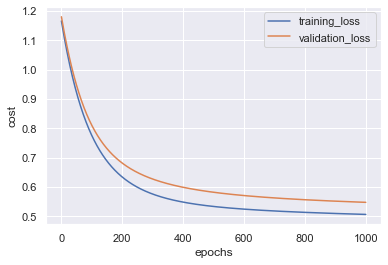

In [793]:
plot(model1_softmax)

In [794]:
#Creating the function to calculate accuracy
def accuracy1(model):
  _, y_hat = torch.max(model(train_set.x), 1)
  return (y_hat == train_set.y).numpy().mean()

def accuracy2(model):
  _, y_hat = torch.max(model(valid_set.x), 1)
  return (y_hat == valid_set.y).numpy().mean()

def accuracy3(model):
  _, y_hat = torch.max(model(test_set.x), 1)
  return (y_hat == test_set.y).numpy().mean()


In [795]:
print('Accuracy of SoftMax:')
print('Accuracy of train set:       ', accuracy1(model1))
print('Accuracy of validation set:  ', accuracy2(model1))
print('Accuracy of test set:        ', accuracy3(model1))

Accuracy of SoftMax:
Accuracy of train set:        0.7763157894736842
Accuracy of validation set:   0.8070175438596491
Accuracy of test set:         0.8275862068965517


In [773]:
model2 = torch.nn.Sequential(torch.nn.Linear(5, 1), torch.nn.Tanh(), torch.nn.Linear(1, 3), torch.nn.Sigmoid())
optimizer2 = torch.optim.SGD(model2.parameters(), lr = 0.01)
criterion2 = torch.nn.CrossEntropyLoss()
train_loader2 = DataLoader(dataset = train_set, batch_size = 32)

In [774]:
model2_shallow = train(model2, criterion = criterion2, train_loader = train_loader2, valid_set = valid_set, optimizer = optimizer2, 
                       epochs = 1000)

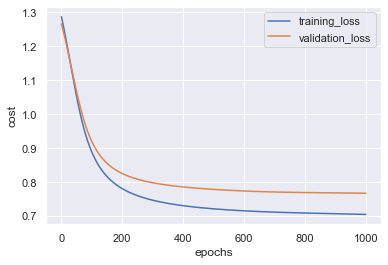

In [775]:
plot(model2_shallow)

In [776]:
print('Accuracy of Shallow Neural Network:')
print('Accuracy of train set:       ', accuracy1(model2))
print('Accuracy of validation set:  ', accuracy2(model2))
print('Accuracy of test set:        ', accuracy3(model2))

Accuracy of Shallow Neural Network:
Accuracy of train set:        0.7631578947368421
Accuracy of validation set:   0.8070175438596491
Accuracy of test set:         0.8275862068965517


In [784]:
#Create deep neural network class
class DeepNeuralNetwork(torch.nn.Module):
    def __init__(self, layers, p):
        super(DeepNeuralNetwork, self).__init__()
        self.hidden = torch.nn.ModuleList()
        self.drop = torch.nn.Dropout(p = p)
        self.BatchNorm = list()
        for input_size, output_size in zip(layers, layers[1:]):
            linear = torch.nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='leaky_relu')
            self.hidden.append(linear)
            self.BatchNorm.append(torch.nn.BatchNorm1d(output_size))

    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = self.BatchNorm[l](torch.nn.functional.leaky_relu(self.drop(linear_transform(activation))))
            else:
                activation = linear_transform(activation)
        return activation

In [785]:
model3 = DeepNeuralNetwork([5, 4, 4, 3], p = 0.4)
optimizer3 = torch.optim.Adam(model3.parameters(), lr = 0.001)
criterion3 = torch.nn.CrossEntropyLoss()
train_loader3 = DataLoader(dataset = train_set, batch_size = 32)

In [786]:
model3_deep = train(model3, criterion = criterion3, train_loader = train_loader3, valid_set = valid_set, optimizer = optimizer3, 
                       epochs = 1000)

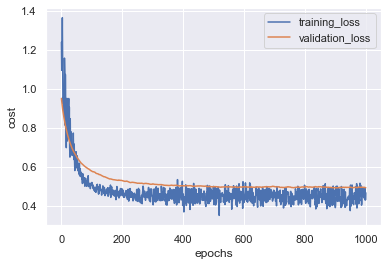

In [787]:
plot(model3_deep)

In [788]:
print('Accuracy of Deep Neural Network:')
print('Accuracy of train set:       ', accuracy1(model3))
print('Accuracy of validation set:  ', accuracy2(model3))
print('Accuracy of test set:        ', accuracy3(model3))

Accuracy of Deep Neural Network:
Accuracy of train set:        0.7807017543859649
Accuracy of validation set:   0.8070175438596491
Accuracy of test set:         0.8620689655172413


In [796]:
pd.DataFrame(data = {'SoftMax': [accuracy1(model1), accuracy2(model1), accuracy3(model1)],
                     'Shallow Neural Network': [accuracy1(model2), accuracy2(model2), accuracy3(model2)],
                     'Deep Neural Network': [accuracy1(model3), accuracy2(model3), accuracy3(model3)]},
             index = ['Training', 'Validation', 'Test'])

,SoftMax,Shallow Neural Network,Deep Neural Network
Training,0.776316,0.763158,0.780702
Validation,0.807018,0.807018,0.807018
Test,0.827586,0.827586,0.862069


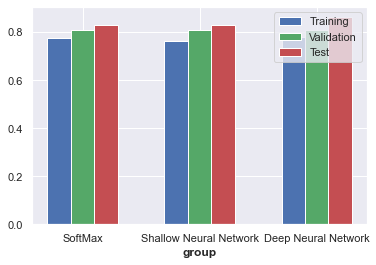

In [797]:
barWidth = 0.2
 
bars1 = [accuracy1(model1), accuracy1(model2), accuracy1(model3)]
bars2 = [accuracy2(model1), accuracy2(model2), accuracy2(model3)]
bars3 = [accuracy3(model1), accuracy3(model2), accuracy3(model3)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Training')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Validation')
plt.bar(r3, bars3, color='r', width=barWidth, edgecolor='white', label='Test')
 
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['SoftMax', 'Shallow Neural Network', 'Deep Neural Network'])
plt.legend()
plt.show()


# Conclusion

From the results, we see that all three algorithms classify vacancies approximately equally, but results of Deep Neural Network model is slightly better.

I cannot say that the results are excellent, since the accuracy is not very high, this can be explained by several factors. 1) The data may contain incorrect data, since they are filled in manually by different employers on the site. 2) It is also possible that the relationship between features is not very well. Also there may be additional factors.

### References

The following resources were used to write the project, namely to understand some points, to select hyperparameters, to improve the performance of models, etc.

<ul>
<li>https://machinelearningmastery.com/improve-deep-learning-performance/</li>
<li>https://jonathan-hui.medium.com/improve-deep-learning-models-performance-network-tuning-part-6-29bf90df6d2d</li>
<li>https://www.coursera.org/learn/deep-neural-networks-with-pytorch/home/welcome</li>
<li>https://www.heatonresearch.com/2017/06/01/hidden-layers.html</li>
</ul>
